Problem Statement No. 15

Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots,
Alexa Firesticks etc. Perform following operations on this dataset.

(I) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)

(II) Convert the review text into lowercase.

(III) Remove all punctuations from review text.

(IV) Remove emoticons and emojis from the text

(V) Tokenize the review text into words.

(VI) Remove the Stopwords from the tokenized text.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("AlexaDataset.csv")

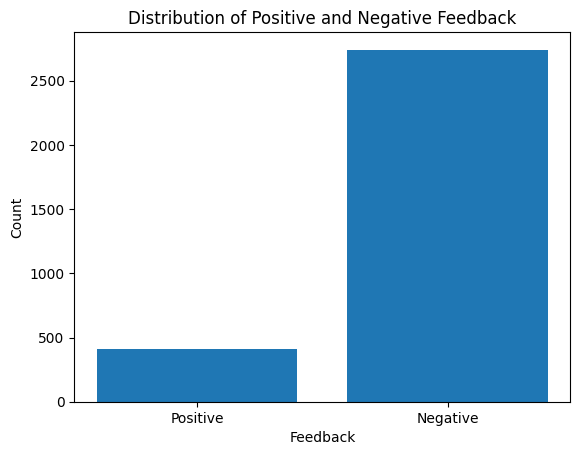

In [4]:
# Define a function to convert star ratings to positive (1) or negative (0) feedback
def convert_to_feedback(rating):
    if rating >= 4:
        return 1  # Positive feedback
    else:
        return 0  # Negative feedback

# Apply the function to create a new column 'Feedback'
df['Feedback'] = df['rating'].apply(convert_to_feedback)

# Count the occurrences of positive and negative feedback
feedback_counts = df['Feedback'].value_counts()

# Plot the graph
plt.bar(feedback_counts.index, feedback_counts.values, tick_label=["Negative", "Positive"])
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative Feedback')
plt.show()

Convert the review text into lowercase.

In [5]:
# Convert the review text to lowercase
df['verified_reviews'] = df['verified_reviews'].str.lower()

# Display the first few rows to verify the conversion
print(df.head())

   rating       date        variation  \
0       5  31-Jul-18  Charcoal Fabric   
1       5  31-Jul-18  Charcoal Fabric   
2       4  31-Jul-18    Walnut Finish   
3       5  31-Jul-18  Charcoal Fabric   
4       5  31-Jul-18  Charcoal Fabric   

                                    verified_reviews  feedback  Feedback  
0                                      love my echo!         1         1  
1                                          loved it!         1         1  
2  sometimes while playing a game, you can answer...         1         1  
3  i have had a lot of fun with this thing. my 4 ...         1         1  
4                                              music         1         1  


Remove all punctuations from review text.

In [11]:
# Function to remove punctuations
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply the function to the review text
df['verified_reviews'] = df['verified_reviews'].apply(remove_punctuation)

Remove emoticons and emojis from the text

In [14]:
# Function to remove emoticons and emojis
def remove_emoticons(text):
    # Define the pattern for emoticons and emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove emoticons and emojis
    return emoji_pattern.sub(r'', text)

# Apply the function to the review text
df['verified_reviews'] = df['verified_reviews'].apply(remove_emoticons)

# Display the modified DataFrame
print(df.head())

   rating       date        variation  \
0       5  31-Jul-18  Charcoal Fabric   
1       5  31-Jul-18  Charcoal Fabric   
2       4  31-Jul-18    Walnut Finish   
3       5  31-Jul-18  Charcoal Fabric   
4       5  31-Jul-18  Charcoal Fabric   

                                    verified_reviews  feedback  Feedback  
0                                       love my echo         1         1  
1                                           loved it         1         1  
2  sometimes while playing a game you can answer ...         1         1  
3  i have had a lot of fun with this thing my 4 y...         1         1  
4                                              music         1         1  


Tokenize the review text into words.
pip install nltk

In [17]:
# Function to tokenize the review text into words
def tokenize_text(text):
    return text.split()

# Apply the function to the review text
df['tokenized_reviews'] = df['verified_reviews'].apply(tokenize_text)

# Display the modified DataFrame
print(df[['verified_reviews', 'tokenized_reviews']].head())

                                    verified_reviews  \
0                                       love my echo   
1                                           loved it   
2  sometimes while playing a game you can answer ...   
3  i have had a lot of fun with this thing my 4 y...   
4                                              music   

                                   tokenized_reviews  
0                                   [love, my, echo]  
1                                        [loved, it]  
2  [sometimes, while, playing, a, game, you, can,...  
3  [i, have, had, a, lot, of, fun, with, this, th...  
4                                            [music]  


Remove the Stopwords from the tokenized text.

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Function to remove stopwords from tokenized text
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the function to the tokenized text
df['tokenized_reviews'] = df['tokenized_reviews'].apply(remove_stopwords)

# Display the modified DataFrame
print(df[['verified_reviews', 'tokenized_reviews']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                    verified_reviews  \
0                                       love my echo   
1                                           loved it   
2  sometimes while playing a game you can answer ...   
3  i have had a lot of fun with this thing my 4 y...   
4                                              music   

                                   tokenized_reviews  
0                                       [love, echo]  
1                                            [loved]  
2  [sometimes, playing, game, answer, question, c...  
3  [lot, fun, thing, 4, yr, old, learns, dinosaur...  
4                                            [music]  


Sure, let's break down the entire practical:

1. Loading the Dataset
The first step is to load the dataset. In this case, we have a dataset stored in a CSV file named "amazon.csv". We use pandas, a Python data manipulation library, to read the CSV file into a DataFrame, which is a tabular data structure.

2. Preprocessing Text Data
a. Lowercasing: We convert all text to lowercase to ensure uniformity and avoid duplication of words due to case differences.

b. Removing Punctuations: Punctuation marks are removed from the text data since they don't usually add significant meaning for many natural language processing tasks.

c. Removing Emoticons and Emojis: Emoticons and emojis are removed from the text data because they are often not relevant for many natural language processing tasks and can interfere with text processing.

3. Tokenization
Tokenization is the process of breaking down text into smaller units, typically words or sentences. We tokenize the preprocessed text into words using NLTK's word_tokenize() function. Tokenization is an essential preprocessing step for many natural language processing tasks, as it allows us to analyze the text at a more granular level.

4. Removing Stopwords
Stopwords are common words that are often filtered out from text data because they typically don't contribute much to the overall meaning of the text. Examples of stopwords include "the", "is", "and", "in", etc. We remove stopwords from the tokenized text using NLTK's English stopwords corpus. However, in the alternative approach, we define our custom list of stopwords and remove them from the tokenized text.

5. Result
After preprocessing, the dataset contains two columns: "verified_reviews", which contains the original text reviews, and "tokenized_reviews", which contains the preprocessed and tokenized text reviews with stopwords removed.

Summary
The practical involves preprocessing text data by converting it to lowercase, removing punctuations, emoticons, and emojis, tokenizing the text into words, and removing stopwords. These preprocessing steps are common in natural language processing tasks and are essential for preparing text data for analysis, classification, or other tasks.